In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [28]:
df = pd.read_csv('convertcsv.csv')

Text(-2.5749999999999886, 0.5, 'Likes Given')

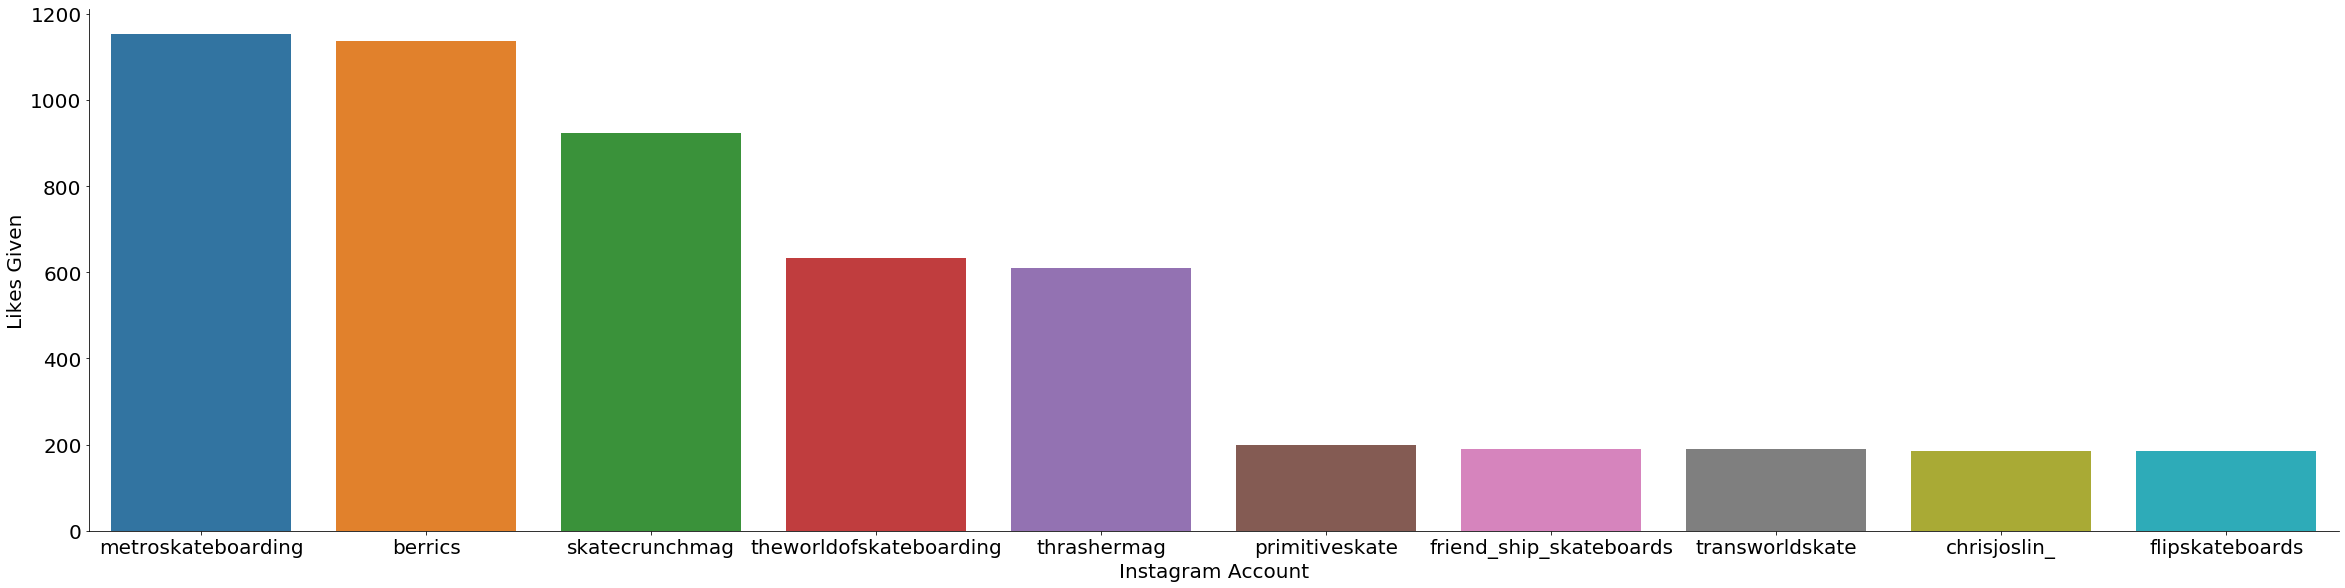

In [29]:
#counting each time I give an account a like
order_data = df['media_likes/1'].value_counts().iloc[:10].index
sns.catplot(x='media_likes/1',
           kind='count',
            height=8, 
            aspect=4,
           data=df, order = order_data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Instagram Account', size = 20)
plt.ylabel('Likes Given', size = 20)

In [30]:
#dropping which account I liked, and comment likes
df = df.drop(['comment_likes/0','media_likes/1','comment_likes/1'], axis=1)

In [31]:
#Assigning one like instance to each date
df['Likes'] = 1
df.columns = ['Date','Likes']
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.head()

,Likes
Date,
2019-12-29 08:37:06,1
2019-12-29 06:52:20,1
2019-12-29 06:51:15,1
2019-12-29 06:50:04,1
2019-12-29 00:07:43,1


In [32]:
#summing up every like that happens in a given 24 hour period
likes_df = df.resample('D').size().reset_index()
df = pd.DataFrame(likes_df)
df.columns = ['ds','y']
df.head()

,ds,y
0,2012-02-04,4
1,2012-02-05,2
2,2012-02-06,0
3,2012-02-07,3
4,2012-02-08,0


In [33]:
p = Prophet(yearly_seasonality=True,changepoint_prior_scale=0.9)
p.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = p.make_future_dataframe(periods = 365, include_history = True)
forecast = p.predict(future)

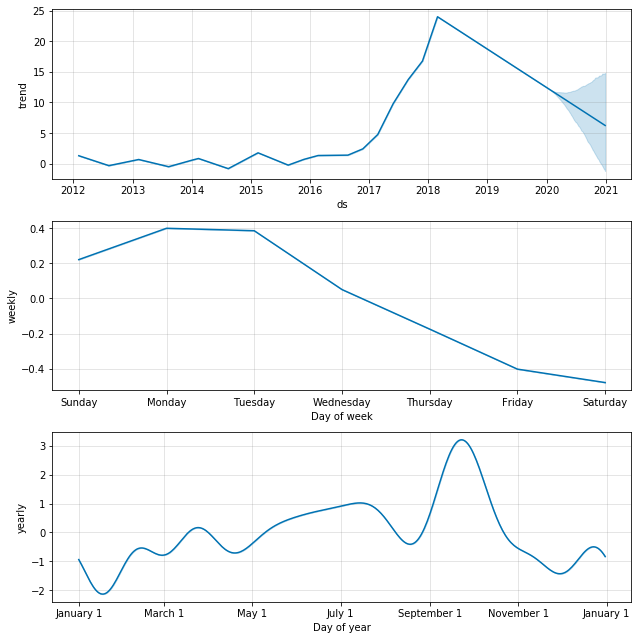

In [35]:
figure3 = p.plot_components(forecast)

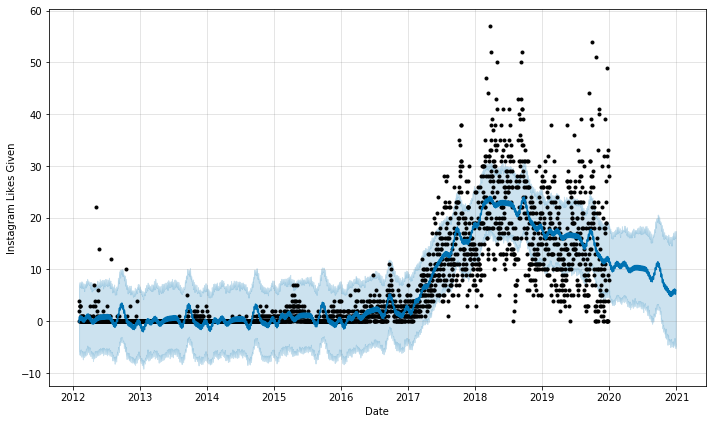

In [36]:
figure = p.plot(forecast, xlabel='Date', ylabel='Instagram Likes Given')